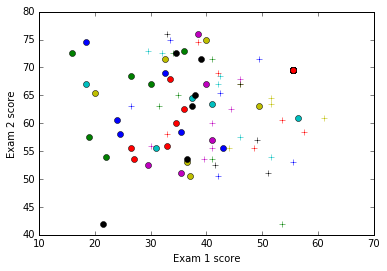

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Exercise 4 - Logistc regression

x = np.genfromtxt('ex4x.dat')
y = np.genfromtxt('ex4y.dat')
y = np.expand_dims(y, axis=1)

# Add intercept term to x

x = np.insert(x, 0, 1, 1)

x = np.matrix(x)
y = np.matrix(y)

# Get positive and negatives
pos = np.where(y==1)
neg = np.where(y==0)

# Plot the training data
# Use different markers for positives and negatives

plt.plot(x[pos, 1], x[neg, 2], '+')
plt.plot(x[neg, 1], x[neg, 2], 'o')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

(m, n) = np.shape(x)

theta = np.zeros(n)
theta = np.expand_dims(theta, axis=1)

In [2]:
sigmoid = lambda a: 1 / (1 + math.exp(-a))

# Vectorize sigmoid so it can operate on whole matrix
vecsig = np.vectorize(sigmoid)

max_itr = 7
j = np.zeros(max_itr)

for i in range(max_itr):
    # Calculate the hypothesis function
    z = x.dot(theta)
    h = vecsig(z)
    h = np.array(h)

    # Calculate the gradient and hessian
    # The implementation below is equivalent to the summation formulas
    grad = x.transpose().dot(h - y) / m
    hes = x.transpose().dot( np.diag(h[:,0]) ).dot( np.diag(1 - h[:,0]) ).dot(x) / m
    
    # Calculate J for testing convergence
    
    # Update theta
    theta = theta - np.linalg.lstsq(hes, grad)[0]
    
theta

matrix([[-16.37874341],
        [  0.14834077],
        [  0.15890845]])